#Description

Initial proposal steps include loading, preprocessing (missing values, categorical encoding, scaling), feature engineering, splitting, training RF, evaluating, and interpreting importance.
  - Identified dataset: international water events (Basins at Risk); target variable is the BAR scale.
  - Predictors will include issue type variables (issue type 1 and issue type 2), which have been standardized and previously binarized; more variables may be added if relevant.
  - The BAR scale has 15 classes (7 negative, 0, 7 positive); recommendation is to first attempt predicting all 15 classes due to distinct theoretical meanings, with later potential consolidation (e.g., 5 classes).
- Additional algorithms to compare
  - Suggestions include trying SVM and logistic regression to compare performance with random forest.
  - Once data restructuring is finalized, running additional models should be straightforward.

In [2]:
# open csv file from MyDrive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections


#Load and Explore Data

In [4]:
df = pd.read_csv('/content/drive/My Drive/CS5540/Final-Project/BAR_events.csv', sep=',',encoding='latin-1', on_bad_lines='warn')

In [5]:
# Get the list of column names (features)
features = df.columns.tolist()

# Display the list of features
print("List of features:")
print(features)

List of features:
['ID', 'UNIQUE_ID', 'Interaction_ID', 'ID1', 'EVENT_MASTER', 'GROUPED_ID', 'BAR_ID', 'SOURCE_ID', 'DATE', 'DYAD_CODE', 'BCode', 'NUMBER_OF_BASINS', 'LOCATION', 'CCODE1', 'CCODE2', 'IRM1', 'IRM2', 'BCCODE1', 'BCCODE2', 'COUNTRY_LIST', 'NUMBER_OF_Countries', 'COPDAB_SCALE', 'BAR_Scale', 'EVENT_TYPE', 'EVENT_SUMMARY', 'Issue_Type1', 'Issue_Type2', 'Macro_Event', 'Comments', 'SOURCE', 'Source_Source', 'KLL_Categ', 'FBIS_Region', 'DOC_DATE', 'EVENT_ISSUE', 'KLL_ISSUE_NUMBER']


In [6]:
#display first 5 rows
display(df.head())

,ID,UNIQUE_ID,Interaction_ID,ID1,EVENT_MASTER,GROUPED_ID,BAR_ID,SOURCE_ID,DATE,DYAD_CODE,...,Issue_Type2,Macro_Event,Comments,SOURCE,Source_Source,KLL_Categ,FBIS_Region,DOC_DATE,EVENT_ISSUE,KLL_ISSUE_NUMBER
0,1,1,1,2.0,3.0,C1,C1,431019,3/16/1948,EGY_INT,...,0.0,Aswan Dam,NaN,COPDAB,Arab World,NaN,NaN,NaN,NaN,NaN
1,2,2,1,3.0,4.0,W17,W17,NaN,4/1/1948,IND_PAK,...,0.0,"Indus Water Sharing, IND-PAK",NaN,Wolf,Wolf - Indus Water Treaty Case Study (Time Line),NaN,NaN,NaN,NaN,NaN
2,3,3,1,4.0,5.0,W18,W18,NaN,5/4/1948,IND_PAK,...,0.0,"Indus Water Sharing, IND-PAK",NaN,Wolf,Wolf - Indus Water Treaty Case Study (Time Line),NaN,NaN,NaN,NaN,NaN
3,4,4,1,5.0,6.0,C2,C2,431014,7/8/1948,FRA_ITA,...,0.0,NaN,"Francence/Italy basin, aka ROYA",COPDAB,Keesing's Contemporary Archives,NaN,NaN,NaN,NaN,NaN
4,5,5,1,36.0,37.0,C3,C3A,430968,7/30/1948,CZS_GBR,...,0.0,Danube Joint Management,NaN,COPDAB,New Times: A Weekly Journal of World Affairs (...,NaN,NaN,NaN,NaN,NaN


In [7]:

df.info()
# Get descriptive statistics for all the columns in the DataFrame
# 'all' includes statistics for columns with objec data types as well as numerical
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7128 entries, 0 to 7127
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7128 non-null   int64  
 1   UNIQUE_ID            7128 non-null   int64  
 2   Interaction_ID       7128 non-null   int64  
 3   ID1                  6709 non-null   float64
 4   EVENT_MASTER         5579 non-null   float64
 5   GROUPED_ID           5569 non-null   object 
 6   BAR_ID               5572 non-null   object 
 7   SOURCE_ID            5009 non-null   object 
 8   DATE                 7110 non-null   object 
 9   DYAD_CODE            7107 non-null   object 
 10  BCode                7128 non-null   object 
 11  NUMBER_OF_BASINS     5996 non-null   float64
 12  LOCATION             5393 non-null   object 
 13  CCODE1               7077 non-null   object 
 14  CCODE2               7053 non-null   object 
 15  IRM1                 5371 non-null   o

,ID,UNIQUE_ID,Interaction_ID,ID1,EVENT_MASTER,GROUPED_ID,BAR_ID,SOURCE_ID,DATE,DYAD_CODE,...,Issue_Type2,Macro_Event,Comments,SOURCE,Source_Source,KLL_Categ,FBIS_Region,DOC_DATE,EVENT_ISSUE,KLL_ISSUE_NUMBER
count,7128.000000,7128.000000,7128.00000,6709.000000,5579.000000,5569,5572,5009,7110,7107,...,6423.000000,2159,3493,6450,5176,2161,1854,2177,4042,2049
unique,NaN,NaN,NaN,NaN,NaN,3110,5530,3590,3089,1363,...,NaN,166,1543,34,510,78,22,862,418,115
top,NaN,NaN,NaN,NaN,NaN,W38,F906,121,7/1/1992,IND_PAK,...,NaN,Danube Water Quality,Date is approximation.,COPDAB,Wolf - The Environmental Program for the Danub...,1,nes,10/4/1999,Joint Management,2
freq,NaN,NaN,NaN,NaN,NaN,75,6,45,78,262,...,NaN,411,398,1559,387,1629,477,72,465,606
mean,3596.672980,2141.576319,5.68729,3781.297362,2864.793870,NaN,NaN,NaN,NaN,NaN,...,2.167056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2077.250115,1105.603236,11.31124,2538.983509,1644.768057,NaN,NaN,NaN,NaN,NaN,...,3.559166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.00000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1798.750000,1310.750000,1.00000,1737.000000,1449.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3591.500000,2226.000000,1.00000,3435.000000,2868.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5395.250000,3014.000000,4.00000,5146.000000,4283.500000,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Create a new dataframe with only 'BAR_Scale' and 'Issue_Type1'
df_subset = df[['BAR_Scale', 'Issue_Type1']].copy()

# Display the first few rows of the new subset dataframe
display(df_subset.head())

# Display the shape of the new subset dataframe
print("\nShape of the subset DataFrame:", df_subset.shape)

,BAR_Scale,Issue_Type1
0,3.0,3.0
1,-3.0,2.0
2,3.0,2.0
3,4.0,10.0
4,1.0,8.0



Shape of the subset DataFrame: (7128, 2)


In [18]:
# Check for missing values in 'BAR_Scale' and 'Issue_Type1' columns
print("Missing values:")
print(df[['BAR_Scale', 'Issue_Type1']].isnull().sum())

Missing values:
BAR_Scale      323
Issue_Type1      1
dtype: int64


In [19]:
# Drop rows with missing values in 'BAR_Scale' or 'Issue_Type1'
# use .copy() to create a duplicate of the dataframe
df_cleaned = df.dropna(subset=['BAR_Scale', 'Issue_Type1']).copy()

# Check for missing values again to confirm that it was successful
print("Missing values:")
print(df_cleaned[['BAR_Scale', 'Issue_Type1']].isnull().sum())

# Display the shape of the cleaned DataFrame
print("\nShape of the cleaned DataFrame:", df_cleaned.shape)

Missing values:
BAR_Scale      0
Issue_Type1    0
dtype: int64

Shape of the cleaned DataFrame: (6804, 36)


In [24]:
# in order to run Random Forest for classification, the input data needs to be categorical
# Convert 'Issue_Type1' to category data type
df['Issue_Type1'] = df['Issue_Type1'].astype('category')

# Verify the data type
print('Issue_type1 data type is now', df['Issue_Type1'].dtype)

Issue_type1 data type is now category


In [26]:
# Get the number of unique values in 'Issue_Type1'
num_unique_issue_types = df_cleaned['Issue_Type1'].nunique()

print(f"The 'Issue_Type1' column has {num_unique_issue_types} unique values.")

The 'Issue_Type1' column has 14 unique values.


In [29]:
# In order to use the Issue_type1 as input for random forest,
# the feature needs to be split into individual features
# Perform one-hot encoding on 'Issue_Type1' from the cleaned DataFrame
df_encoded = pd.get_dummies(df_cleaned, columns=['Issue_Type1'], prefix='Issue_Type1', dtype=int)

# Keep only 'BAR_Scale' and the one-hot encoded 'Issue_Type1' columns
encoded_issue_cols = [col for col in df_encoded.columns if 'Issue_Type1_' in col]
df_encoded = df_encoded[['BAR_Scale'] + encoded_issue_cols]


# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

# Display the shape of the encoded DataFrame
print("\nShape of the encoded DataFrame:", df_encoded.shape)
print('The dataframe is ready for analysis')

,BAR_Scale,Issue_Type1_0.0,Issue_Type1_1.0,Issue_Type1_2.0,Issue_Type1_3.0,Issue_Type1_4.0,Issue_Type1_5.0,Issue_Type1_6.0,Issue_Type1_7.0,Issue_Type1_8.0,Issue_Type1_9.0,Issue_Type1_10.0,Issue_Type1_11.0,Issue_Type1_12.0,Issue_Type1_13.0
0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,-3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0



Shape of the encoded DataFrame: (6804, 15)
The dataframe is ready for analysis


In [30]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the encoded dataframe
X = df_encoded.drop('BAR_Scale', axis=1)
y = df_encoded['BAR_Scale']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5443, 14)
Shape of X_test: (1361, 14)
Shape of y_train: (5443,)
Shape of y_test: (1361,)


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# Using a relatively small number of estimators for demonstration; this can be tuned
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

print("Random Forest model is trained.")

Random Forest model is trained.


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# run the test set through the model
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        -6.0       0.00      0.00      0.00         7
        -5.0       0.00      0.00      0.00         9
        -4.0       0.00      0.00      0.00         2
        -3.0       0.00      0.00      0.00        29
        -2.0       0.00      0.00      0.00        75
        -1.0       0.00      0.00      0.00       148
         0.0       0.00      0.00      0.00        57
         1.0       0.31      0.81      0.45       379
         2.0       0.37      0.39      0.38       178
         3.0       0.00      0.00      0.00       140
         4.0       0.42      0.26      0.32       240
         5.0       0.20      0.17      0.18         6
         6.0       0.71      0.19      0.30        91

    accuracy                           0.34      1361
   macro avg       0.15      0.14      0.13      1361
weighted avg       0.26      0.34      0.25      1361


Confusion Matrix:
[[  0   0   0   0   0   0   0   7   0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Feature Importances:


,0
Issue_Type1_7.0,0.244156
Issue_Type1_1.0,0.200590
Issue_Type1_2.0,0.108894
Issue_Type1_11.0,0.105351
Issue_Type1_8.0,0.086204
Issue_Type1_10.0,0.051322
Issue_Type1_9.0,0.044861
Issue_Type1_6.0,0.037356
Issue_Type1_3.0,0.029501
Issue_Type1_12.0,0.023146


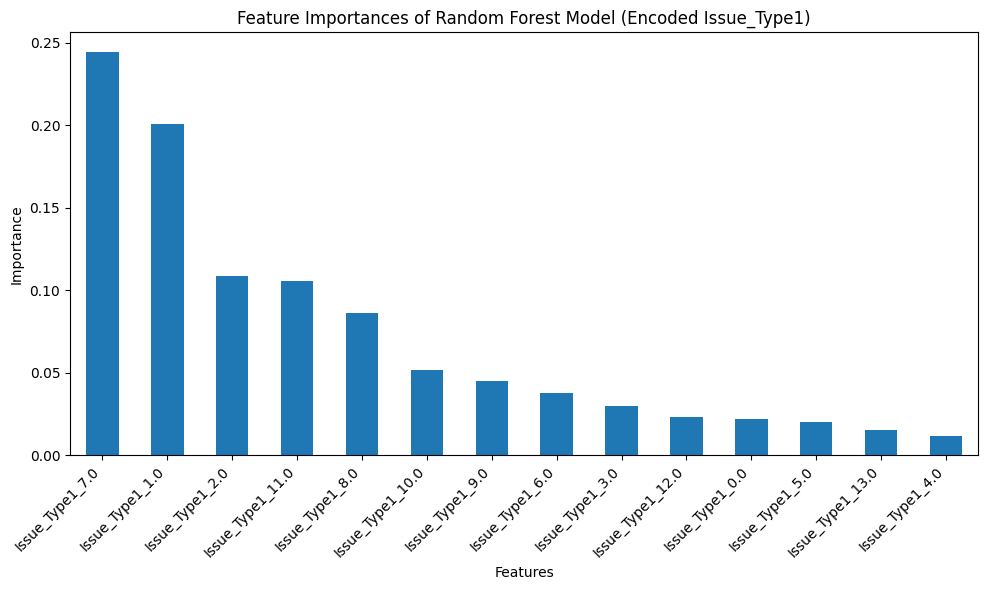

In [34]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a pandas Series for better visualization
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
feature_importances_series_sorted = feature_importances_series.sort_values(ascending=False)

# Display the feature importances
print("Feature Importances:")
display(feature_importances_series_sorted)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances_series_sorted.plot(kind='bar')
plt.title('Feature Importances of Random Forest Model (Encoded Issue_Type1)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()